# scanning over single parameters

## initializing parameters

In [1]:
import VisionSNN

args = VisionSNN.init()

In [2]:
args.tag = '2020-11-13_running-time'
args.do_save = False

In [3]:
args.verbose = False
args

Namespace(E_expPar=1.0, E_v_tresh=-50, E_weight=0.08, Eone_weight=0.08, I_expPar=2.0, I_v_tresh=-50, I_weight=0.08, Ione_weight=0.08, N_pop=900, N_tau=30.0, do_save=False, dt=1, figpath='figures', im_contrast=0.1, im_noise=0.0, max_delay=100, min_delay=1, outpath='outputs', scalePar=1.0, simtime=1000, simulator='default', tag='2020-11-13_running-time', verbose=False, waveVelocity=0.1)

In [4]:
args.max_delay = 500
args

Namespace(E_expPar=1.0, E_v_tresh=-50, E_weight=0.08, Eone_weight=0.08, I_expPar=2.0, I_v_tresh=-50, I_weight=0.08, Ione_weight=0.08, N_pop=900, N_tau=30.0, do_save=False, dt=1, figpath='figures', im_contrast=0.1, im_noise=0.0, max_delay=500, min_delay=1, outpath='outputs', scalePar=1.0, simtime=1000, simulator='default', tag='2020-11-13_running-time', verbose=False, waveVelocity=0.1)

In [5]:
%mkdir -p outputs

## Running Model and Loading Results

In [6]:
import os
import time
import pandas as pd
verbose = True
def scan(variable, values, tag=args.tag, verbose=verbose):
    filename = f'outputs/{tag}_{variable}.json'
    try:
        df = pd.read_json(filename)
        print('Loaded file')
    except:
        df = pd.DataFrame([], columns=[variable, 'runtime'])
        for i, value in enumerate(values):
            if verbose: print(f'{variable=}---{value=}')
            tic = time.time()
            b = VisionSNN.Bump2D(args)
            b.d[variable] = value
            b.run()
            toc = time.time()
            if verbose: print(f'Done in {toc -tic=}')
            df.loc[i]= {variable: value, 'runtime':(toc - tic)}
        df.to_json(filename)
    return df

In [7]:
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/31978948/python-stats-models-quadratic-term-in-regression
def plot(df):
    variable = df.columns[0]
    fig, ax = plt.subplots(figsize=(8,8))

    import patsy
    y, X = patsy.dmatrices(f'runtime ~ {variable}', data=df, return_type='dataframe')
    
    import statsmodels.api as sm
    fit = sm.OLS(y, X).fit()
    print(fit.summary())
    
    intercept = fit.params.Intercept
    slope = fit.params[variable]

    values = np.array(df[variable])
    ax.plot(values, intercept + slope*values, lw=2, label=f"t={slope:.3f}*{variable} + {intercept:.3f}")
    df.plot(x=variable, y='runtime', c='r', lw=1, ls='-.', ax=ax, legend=False)
    
    ax.set_xlim(0)
    ax.set_ylabel('Simulation time (s)')
    ax.set_ylim(0)
    ax.legend()
    return ax

## plot as a function of neuron numbers

In [8]:
import numpy as np
N_pops = np.array([int(k)**2 for k in np.linspace(8**2, 45**2, 14, endpoint=True)**.5])
N_pops

array([  64,  196,  361,  484,  625,  784,  961, 1089, 1225, 1369, 1521,
       1681, 1849, 2025])

In [9]:
results_pop = scan('N_pop', N_pops)

Loaded file


                            OLS Regression Results                            
Dep. Variable:                runtime   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     199.0
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           7.83e-09
Time:                        08:54:48   Log-Likelihood:                -65.516
No. Observations:                  14   AIC:                             135.0
Df Residuals:                      12   BIC:                             136.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.3188     14.761     -3.680      0.0

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1449: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<AxesSubplot:xlabel='N_pop', ylabel='Simulation time (s)'>

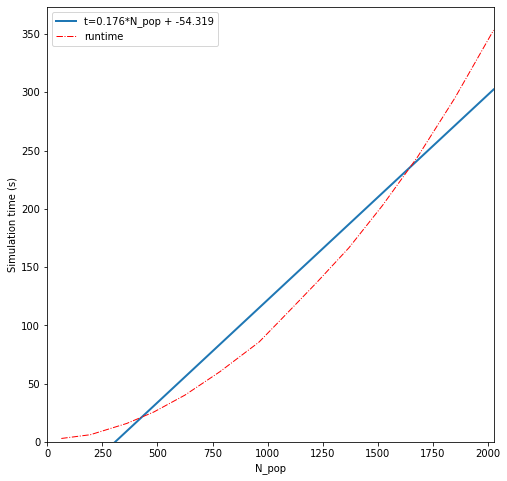

In [10]:
plot(results_pop)

In [11]:
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pyNN

In [13]:
import pyNN.nest as sim

CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH


/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/__init__.py:53: UserWarning:Unable to install NEST extensions. Certain models may not be available.


## plot as a function of simtime

In [14]:
args.N_pop = 100**2
simtimes = np.linspace(500, 3000, 15, endpoint=True)
simtimes

array([ 500.        ,  678.57142857,  857.14285714, 1035.71428571,
       1214.28571429, 1392.85714286, 1571.42857143, 1750.        ,
       1928.57142857, 2107.14285714, 2285.71428571, 2464.28571429,
       2642.85714286, 2821.42857143, 3000.        ])

In [ ]:
results_simtime = scan('simtime', simtimes)

variable='simtime'---value=500.0


/usr/lib/python3.8/dist-packages/nest/lib/hl_api_helper.py:127: UserWarning:
ResetNetwork is deprecated and will be removed in NEST 3.0.
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in


connType is float
connType is string
connType is string
connType is float


In [ ]:
plot(results_simtime)      

# scanning over two parameters

## Setting-up model and initializing parameters

In [ ]:
import VisionSNN

In [ ]:
args = VisionSNN.init()

In [ ]:
args.tag = '2020-11-03_running-time-2D'
args.do_save = False
args.verbose = False

In [ ]:
args

In [ ]:
b = VisionSNN.Bump2D(args)

## Running Model and Loading Results

In [ ]:
variables = ['N_pop', 'simtime']
filename = f'outputs/{args.tag}'
for variable in variables: filename +=  '_' + variable
filename += '.json'

In [ ]:
import os
import time
import pandas as pd
verbose = True
def scan(variables, values, tag=args.tag, verbose=verbose):
    filename = f'outputs/{args.tag}'
    for variable in variables: filename +=  '_' + variable
    filename += '.json'
    try:
        df = pd.read_json(filename)
        print('Loaded file')
    except:
        df = pd.DataFrame([], columns=variables + ['runtime'])
        for i, value in enumerate(values):
            if verbose: print(f'{i=} | {variables=}---{value=}')
            tic = time.time()
            b = VisionSNN.Bump2D(args)
            for variable, v in zip(variables, value):
                print(variable, v)
                b.d[variable] = v
            b.run()
            toc = time.time()
            if verbose: print(f'Done in {toc - tic=:.3f} s = {(toc - tic)*1000:.3f} ms')
            df.loc[i]= dict(zip(variables + ['runtime'], list(value) + [(toc - tic)*1000]))
        df.to_json(filename)
    return df

## Running time as a function of neuron numbers and simtime

In [ ]:
import numpy as np

In [ ]:
N_trials = 200
N_pops = [int(k)**2 for k in np.linspace(15, 60, N_trials, endpoint=True)]
simtimes = np.linspace(200, 3000, N_trials, endpoint=True)

In [ ]:
np.random.seed(42)
np.random.shuffle(N_pops)
np.random.shuffle(simtimes)
values = zip(N_pops, simtimes)

In [ ]:
results = scan(variables=variables, values=values)
results

## analysis

In [ ]:
results_ext = results.copy()
results_ext['simtime_N_pop'] = results_ext['simtime'] * results_ext['N_pop']
results_ext

In [ ]:
variables_ext = ['N_pop', 'simtime_N_pop']
X = results_ext[variables_ext].values.reshape(-1, len(variables_ext))
y = results_ext['runtime'].values
print(variables_ext, X.shape, y.shape)

https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

See https://patsy.readthedocs.io/en/latest/quickstart.html

In [ ]:
import patsy
import statsmodels.api as sm

y, X = patsy.dmatrices('runtime ~ 0 + N_pop + simtime_N_pop', data=results_ext, return_type='dataframe')

fit = sm.OLS(y, X).fit()
fit.summary()

In [ ]:
print(f'running_time (ms) = {fit.params[0]:.3f} * N_pop + {fit.params[1]*1000:.3f}/1000 * simtime (ms) * N_pop')